In [126]:
import os

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload

import analysis

In [127]:
local_data = pd.read_csv('MapFileData-WithCountyResultsAndCovariates.csv')
national_data = pd.read_csv('national_data.csv')

before = 'm.RR_{}_Armed_Versus_Unarmed'
after = 'm.RR_{}_Unarmed_Versus_Armed'

# Create one more column for simplicity with inverse ratios
for r in ['Black', 'White', 'Hispanic']:
    local_data[after.format(r)] = 1. / local_data[before.format(r)]
    national_data[after.format(r)] = 1. / national_data[before.format(r)]

In [128]:
county = 'San Francisco'
local_data.loc[local_data['county'] == county][national_data.columns]

,m.RR_Black_Armed_Versus_Unarmed,m.RR_White_Armed_Versus_Unarmed,m.RR_Hispanic_Armed_Versus_Unarmed,m.RR_Black_Armed_Versus_White_Armed,m.RR_Hispanic_Armed_Versus_White_Armed,m.RR_Black_Unarmed_Versus_White_Unarmed,m.RR_Hispanic_Unarmed_Versus_White_Unarmed,m.RR_Black_Unarmed_Versus_White_Armed,m.RR_Hispanic_Unarmed_Versus_White_Armed,m.RR_Black_Unarmed_Versus_Armed,m.RR_White_Unarmed_Versus_Armed,m.RR_Hispanic_Unarmed_Versus_Armed
246,3.403296,4.283374,4.563916,3.481455,2.247141,4.727985,2.090922,1.01136,0.469037,0.293833,0.233461,0.21911


In [129]:
national_data

,m.RR_Black_Armed_Versus_Unarmed,m.RR_White_Armed_Versus_Unarmed,m.RR_Hispanic_Armed_Versus_Unarmed,m.RR_Black_Armed_Versus_White_Armed,m.RR_Hispanic_Armed_Versus_White_Armed,m.RR_Black_Unarmed_Versus_White_Unarmed,m.RR_Hispanic_Unarmed_Versus_White_Unarmed,m.RR_Black_Unarmed_Versus_White_Armed,m.RR_Hispanic_Unarmed_Versus_White_Armed,m.RR_Black_Unarmed_Versus_Armed,m.RR_White_Unarmed_Versus_Armed,m.RR_Hispanic_Unarmed_Versus_Armed
0,2.79,3.33,3.08,2.94,1.57,3.49,1.67,1.04,0.52,0.358423,0.3003,0.324675


# Armed vs. Armed

In [130]:
features = ['m.RR_Black_Armed_Versus_White_Armed', 'm.RR_Hispanic_Armed_Versus_White_Armed']

[3.5, 2.5, 1, 0]
[2.9399999999999999, 3.4814549819999998, 1.5700000000000001, 2.2471410730000003]


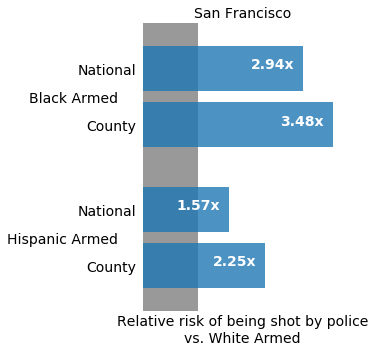

In [131]:
reload(analysis)
plt.close()
f, ax = plt.subplots(1, figsize=(5, 5))

analysis.make_barplot(national_data, local_data, county, features, ax)
f.tight_layout()
plt.savefig('{}_{}.png'.format(county, 'A-A'), dpi=300)

# Unarmed vs. Armed

In [132]:
features = ['m.RR_Black_Unarmed_Versus_White_Armed',
            'm.RR_Hispanic_Unarmed_Versus_White_Armed',
            'm.RR_White_Unarmed_Versus_Armed']

[6.0, 5.0, 3.5, 2.5, 1, 0]
[1.04, 1.0113597080000001, 0.52000000000000002, 0.469036536, 0.3003003003003003, 0.23346079256041211]


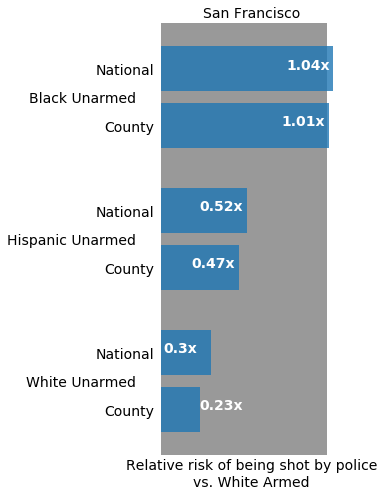

In [133]:
reload(analysis)
plt.close()
f, ax = plt.subplots(1, figsize=(5, 7))

analysis.make_barplot(national_data, local_data, county, features, ax)
f.tight_layout()
plt.savefig('{}_{}.png'.format(county, 'U-A'), dpi=300)

# Unarmed vs. Unarmed

In [134]:
features = ['m.RR_Black_Unarmed_Versus_White_Unarmed', 'm.RR_Hispanic_Unarmed_Versus_White_Unarmed']

[3.5, 2.5, 1, 0]
[3.4900000000000002, 4.7279854349999999, 1.6699999999999999, 2.0909221609999999]


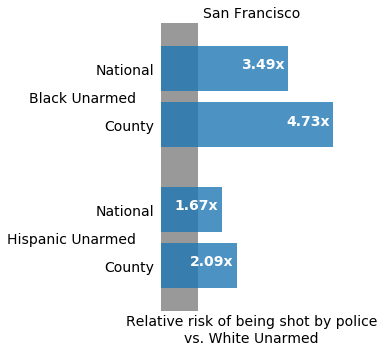

In [135]:
reload(analysis)
plt.close()
f, ax = plt.subplots(1, figsize=(5, 5))

analysis.make_barplot(national_data, local_data, county, features, ax)
f.tight_layout()
plt.savefig('{}_{}.png'.format(county, 'U-U'), dpi=300)